# Project 03. Employee Retention

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.tight_layout()
plt.rcParams["patch.force_edgecolor"] = True

import warnings
warnings.simplefilter('ignore')


<Figure size 432x288 with 0 Axes>

# Table of Contents
  1. [Read data](#readdata)
  2. [Create Headcount Table](#createheadcounttable)
  3. [Employee Churn Analysis](#employeechurnanalysis)
  4. [Machine Learning](#machinelearning)

<a id='read_data'></a>
## Read Data

In [2]:
data=pd.read_csv('C:/Users/xiaoj/Desktop/CS/collection of data science-take home challenges/Data/3. employee_retention.csv')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [4]:
# transfer join_date and quit_date to datetime
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])           

In [5]:
# Check the unique numbers of some columns
print('company_id: ', data['company_id'].nunique())
print('dept:       ', data['dept'].nunique())

company_id:  12
dept:        6


In [6]:
# Check the Null values in dataset
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [7]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [8]:
# Since seniority denote the number of yeas of work experience when hired, so the max is abnormal
# remove outliers
data = data[data['seniority']<=40]

<a id='createheadcounttable'></a>
## Create HeadCount Table

In [9]:
# create a new table including day,company_id,employee_headcount
date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
company = data['company_id'].unique()

day = []
companyid = []
headcount = []

for date in date:
    for id in company:
        quit = data[(data['quit_date'] <=date)&(data['company_id'] == id)]['employee_id'].sum()
        join = data[(data['join_date'] <=date)&(data['company_id'] == id)]['employee_id'].sum()                                         
        day.append(date)                                                  
        companyid.append(id)                                                  
        headcount.append(join-quit)

HeadCount = pd.DataFrame()
HeadCount['Day'],HeadCount['Company ID'],HeadCount['Employee Headcount'] = day,companyid,headcount
HeadCount.head()       

,Day,Company ID,Employee Headcount
0,2011-01-24,7,350664.0
1,2011-01-24,4,6288524.0
2,2011-01-24,2,7538709.0
3,2011-01-24,9,1718984.0
4,2011-01-24,1,12874805.0


<a id='employeechurnanalysis'></a>
## Employee Churn Analysis

In [10]:
# Get the empolyee quit and stay data 
quit = data[data['quit_date'].notnull()]
stay = data[data['quit_date'].isnull()]

Text(0.5, 0, 'Total Working Years')

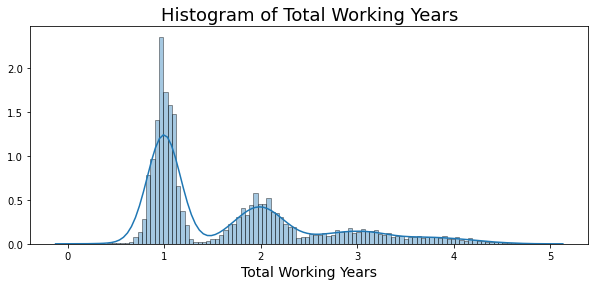

In [11]:
# Check the total working years and distribution
total_working_years = (quit['quit_date']-quit['join_date']).apply(lambda x:x.days/365)
plt.figure(figsize=(10,4))
sns.distplot(total_working_years,bins=100)
plt.title('Histogram of Total Working Years',fontsize=18)
plt.xlabel('Total Working Years',fontsize=14)

Text(0, 0.5, 'Count')

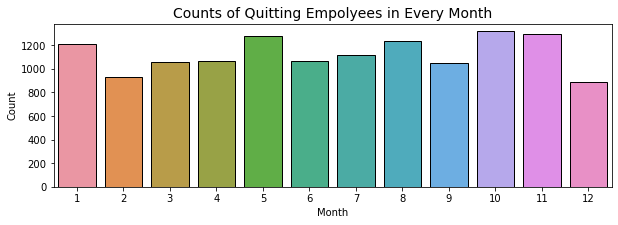

In [12]:
# Check the Week Number of Empolyee Quiting
quit_month = quit['quit_date'].apply(lambda x:x.month)
plt.figure(figsize=(10,3))
sns.countplot(quit_month)
plt.title('Counts of Quitting Empolyees in Every Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')

Text(0, 0.5, 'Quit Rate')

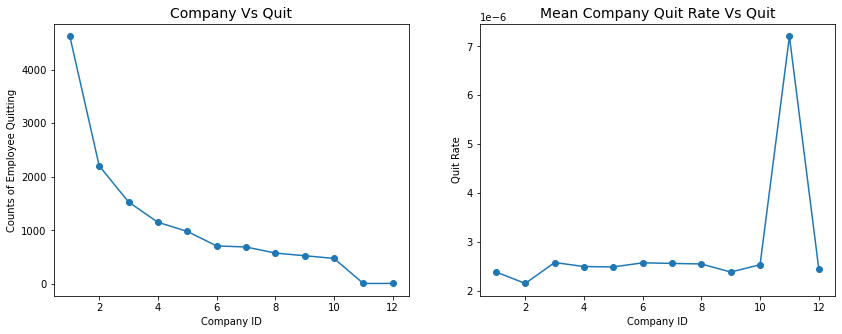

In [13]:
# Check the relationship between quit-numbers and headcount in different company
HeadCount_company = HeadCount[HeadCount['Day']=='2015-12-13'].sort_values('Company ID').set_index('Company ID')['Employee Headcount']
quit_company = quit.groupby('company_id')['employee_id'].count()

fig,ax=plt.subplots(1,2,figsize=(14,5))
ax[0].plot(quit_company,marker='o')
ax[0].set_title('Company Vs Quit',fontsize=14)
ax[0].set_xlabel('Company ID')
ax[0].set_ylabel('Counts of Employee Quitting')
   
ax[1].plot(quit_company/HeadCount_company,marker='o')
ax[1].set_title('Mean Company Quit Rate Vs Quit',fontsize=14)
ax[1].set_xlabel('Company ID')
ax[1].set_ylabel('Quit Rate')

In [15]:
quit_company = quit.groupby('company_id',as_index=True)['employee_id'].count()
quit_company

company_id
1     4620
2     2206
3     1531
4     1153
5      983
6      712
7      692
8      579
9      529
10     479
11      12
12      12
Name: employee_id, dtype: int64

In [16]:
quit.groupby('company_id')['employee_id'].count()

company_id
1     4620
2     2206
3     1531
4     1153
5      983
6      712
7      692
8      579
9      529
10     479
11      12
12      12
Name: employee_id, dtype: int64

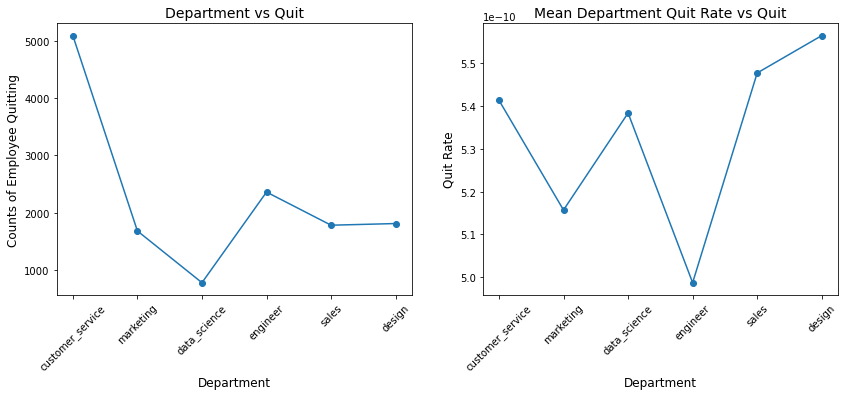

In [22]:
# Check the department Vs quit
final_data = pd.merge(data,HeadCount,how='left',left_on='company_id',right_on='Company ID')
final_data_dept = final_data[final_data['Day']=='2015-12-13'].groupby('dept').sum()['Employee Headcount']
quit_dept = quit.groupby('dept')['employee_id'].count()

fig,ax=plt.subplots(1,2,figsize=(14,5))
ax[0].plot(quit_dept,marker='o')
ax[0].set_title('Department vs Quit',fontsize=14)
ax[0].set_xlabel('Department',fontsize=12)
ax[0].set_ylabel('Counts of Employee Quitting',fontsize=12)
ax[0].set_xticklabels(quit['dept'].unique(), rotation=45, fontsize=10)


ax[1].set_title('Mean Department Quit Rate vs Quit',fontsize=14)
ax[1].set_xlabel('Department',fontsize=12)
ax[1].set_ylabel('Quit Rate',fontsize=12)
ax[1].set_xticklabels(quit['dept'].unique(),rotation=45, fontsize=10)
ax[1].plot(quit_dept/final_data_dept,marker='o')

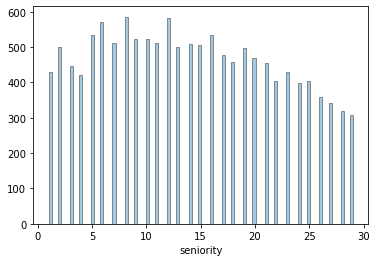

In [23]:
# Check relationship between 'Seniority' and Quit
sns.distplot(quit['seniority'],kde=False,bins=100)

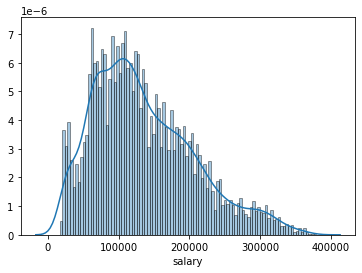

In [24]:
# Check relationship between 'Salary' and Quit
sns.distplot(quit['salary'],bins=100)

<a id='machinelearning'></a>
## Machine Learning

Here machine learning is not used to predict but mainly used as a descriptive stat tool

In [111]:
#remove those who still stay in the current company but less than 13 months
# 1.calculate date point at which employee stay in current company less than 13 months
cut_off = pd.to_datetime('2015-12-13')-pd.DateOffset(days=365+31)

# 2. get the dataset which only includes empolyee who work in the current company for less than 13 months
not_quit = data[data['quit_date'].isnull()==True]
subset0 = not_quit[not_quit['join_date']>=cut_off]

# 3. remove the employee who work in current company for less than 13 months
subset=pd.concat([data,subset0]).drop_duplicates(keep=False)
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19447 entries, 0 to 24699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  19447 non-null  float64       
 1   company_id   19447 non-null  int64         
 2   dept         19447 non-null  object        
 3   seniority    19447 non-null  int64         
 4   salary       19447 non-null  float64       
 5   join_date    19447 non-null  datetime64[ns]
 6   quit_date    13508 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [114]:
# Buit a new column 'quit<=13m' which indicate those who work in a company less than or equal 13 months and quit.
subset['quit<=13m'] = subset['quit_date']<=subset['join_date']+pd.DateOffset(396)
subset['quit<=13m'] = subset['quit<=13m'].astype('int')

In [115]:
# dept_dummies = pd.get_dummies(subset['dept'])
# pd.concat([subset[['company_id','seniority','salary']],dept_dummies],axis=1)

,company_id,seniority,salary,customer_service,data_science,design,engineer,marketing,sales
0,7,28,89000.0,1,0,0,0,0,0
1,7,20,183000.0,0,0,0,0,1,0
2,4,14,101000.0,0,0,0,0,1,0
3,7,20,115000.0,1,0,0,0,0,0
4,2,23,276000.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24692,1,28,249000.0,0,1,0,0,0,0
24693,9,10,173000.0,0,1,0,0,0,0
24695,1,5,172000.0,0,1,0,0,0,0
24696,6,7,88000.0,0,0,0,0,1,0


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train = subset[['company_id','seniority','salary']]
x_train['dept'] = le.fit_transform(subset['dept'])
y_train=subset['quit<=13m']

,company_id,seniority,salary,dept
0,7,28,89000.0,0
1,7,20,183000.0,4
2,4,14,101000.0,4
3,7,20,115000.0,0
4,2,23,276000.0,1


In [97]:
# Buid decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X=x_train, y=y_train)

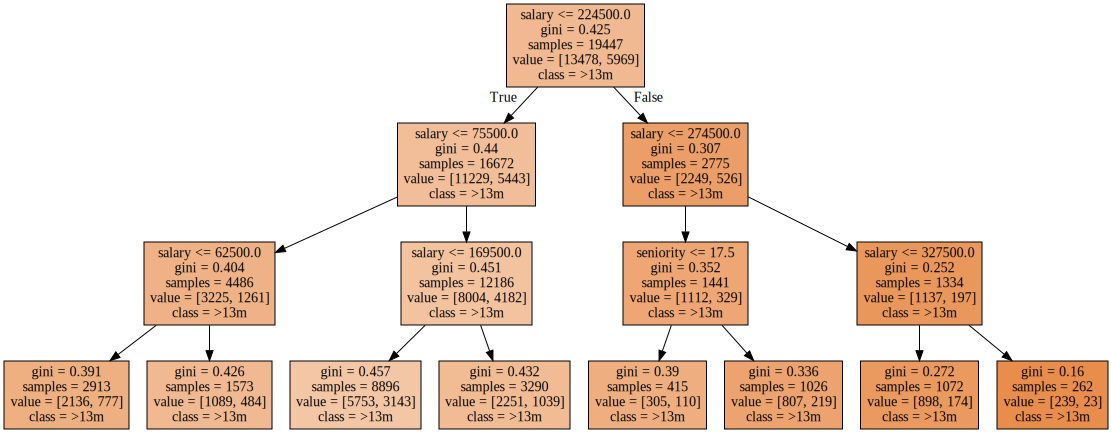

In [98]:
# Visualization
import graphviz
features = list(x_train.columns)
targets = ['>13m','quit<=13m']
dot_data = tree.export_graphviz(clf,feature_names=features, class_names=targets, filled=True)
graph = graphviz.Source(dot_data)
graph

Text(0.5, 1.0, 'Feature Importances')

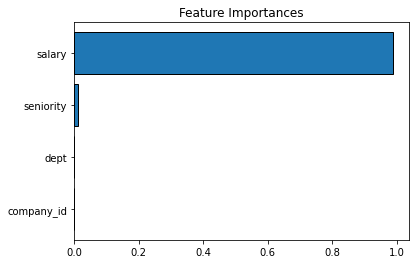

In [80]:
# feature importance and visulisation
importance = clf.feature_importances_
sorted_idx = clf.feature_importances_.argsort()

plt.figure()
plt.barh(x_train.columns[sorted_idx],clf.feature_importances_[sorted_idx])
plt.title('Feature Importances')

It can be seen from above analysis that 'salary' is the most important factor that drive people to leave.

(0.1, 0.4)

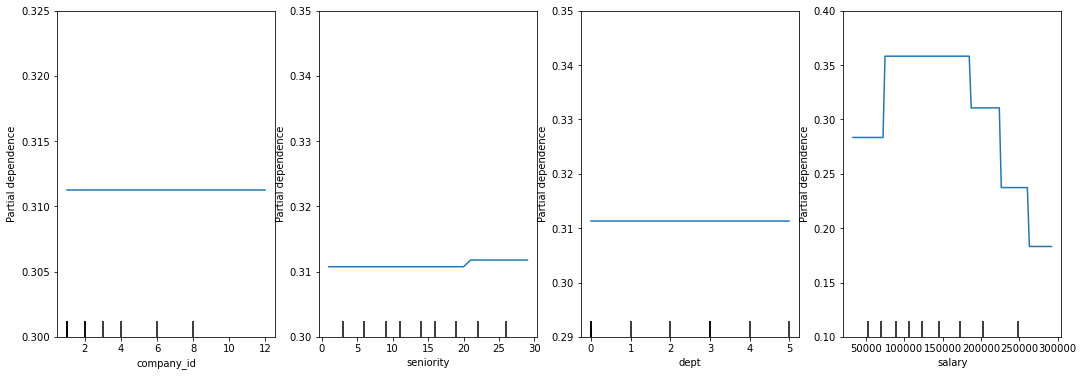

In [137]:
# Check the plot_partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test = train_test_split(x_train,y_train,test_size=0.33)
clf.fit(x_test,y_test)

fig,ax=plt.subplots(1,4,figsize=(18,6))
features=['company_id','seniority','dept','salary']
plot_partial_dependence(clf,x_train,features,ax=ax)
ax[0].set_ylim(0.3,0.325)
ax[1].set_ylim(0.30,0.35)
ax[2].set_ylim(0.29,0.35)
ax[3].set_ylim(0.1,0.4)

Summary:
1. There are peaks around empolyee working years anniversary. It makes sense since after working for one or more anniversaies, people can have a better resume and often get stocks.

2. There are no obvious trend to show at which month in a year people would like to quit.

3. It seems that company culture has great effects on quitting. In the current dataset, empolyees in company 1 are prone to leaving.But if compared the mean quitting rate, company 1 is still ok since it also recruit the most people whereas company 11 has the smallest quitting employee but highest mean quitting rate.

4. Cutermer service has higher empolyee churn, while some department which need more technique, such as design,data_science, showed relatively lower emplyee churn. 

5. If peole have more seniority, such as more than 20 years, they prefer to stay. This also make sense, since if people have more than 20 years working experience, they perfer to stay at the current place instead of pursuing new company.

6. Combined with feature importance and salary vs.quit, it can be found that salary is the most importact factor that drive people to quite. And employee with low and high salaries are less likely to quit. It maybe because people with high salaries are happy there and those with low salaries are not easy to find job. And people with meidum income are most likely to quit and pursue new job. 